### Imports de bibliotecas:

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


O Dataset "df2" sera utilizado mais na frente, pois separei ele exclusivamente no xgboost.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/atividade_ml/flight_delays_train.csv')
df2 = pd.read_csv('/content/gdrive/MyDrive/atividade_ml/flight_delays_train.csv')

O Dataset "df2test" sera utilizado mais na frente, pois separei ele exclusivamente no teste do xgboost.

In [ ]:
dftest = pd.read_csv('/content/gdrive/MyDrive/atividade_ml/flight_delays_test.csv', header=0, sep=',')
df2test = pd.read_csv('/content/gdrive/MyDrive/atividade_ml/flight_delays_test.csv', header=0, sep=',')

In [ ]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


estava enfrentando problemas para usar one-hot encoder, pois como pode ser percebido, a coluna unique carrier tem um valor diferente no dataset "df" quando comparado ao valor que ela tem no dataset "dftest", ambos fornecidos pelo kaggle, servindo para treinamento e teste, respectivamente. Por essa razao, decidi usar o LabelEncoder.

In [ ]:
df.nunique()

Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1300
UniqueCarrier          22
Origin                289
Dest                  289
Distance             1310
dep_delayed_15min       2
dtype: int64

In [ ]:
dftest.nunique()

Month              12
DayofMonth         31
DayOfWeek           7
DepTime          1287
UniqueCarrier      20
Origin            300
Dest              298
Distance         1331
dtype: int64

# **Tratamento de Dados:**

Primeiro, tirei a string "c-" que precede os meses, dias dos meses e dias da semana.

In [ ]:
# Função para extrair números das strings
def extract_number(s):
    return int(s.split('-')[1])

# Aplicar a função às colunas
df['Month'] = df['Month'].apply(extract_number)
df['DayofMonth'] = df['DayofMonth'].apply(extract_number)
df['DayOfWeek'] = df['DayOfWeek'].apply(extract_number)

Repeti o mesmo no dataset "df2"

In [ ]:
# Função para extrair números das strings
def extract_number(s):
    return int(s.split('-')[1])

# Aplicar a função às colunas
df2['Month'] = df2['Month'].apply(extract_number)
df2['DayofMonth'] = df2['DayofMonth'].apply(extract_number)
df2['DayOfWeek'] = df2['DayOfWeek'].apply(extract_number)

Repeti o mesmo no dataset "dftest"

In [ ]:
# Função para extrair números das strings
def extract_number(s):
    return int(s.split('-')[1])

# Aplicar a função às colunas
dftest['Month'] = dftest['Month'].apply(extract_number)
dftest['DayofMonth'] = dftest['DayofMonth'].apply(extract_number)
dftest['DayOfWeek'] = dftest['DayOfWeek'].apply(extract_number)

Repeti o mesmo no dataset "df2test"

In [ ]:
# Função para extrair números das strings
def extract_number(s):
    return int(s.split('-')[1])

# Aplicar a função às colunas
df2test['Month'] = df2test['Month'].apply(extract_number)
df2test['DayofMonth'] = df2test['DayofMonth'].apply(extract_number)
df2test['DayOfWeek'] = df2test['DayOfWeek'].apply(extract_number)

Utilizei LabelEncoder em todas as colunas onde a normalizacao foi necessaria em ambos os datasets, como dito anteriormente.

In [ ]:
# Inicialize o LabelEncoder
label_encoder = LabelEncoder()

# Aplique o Label Encoding para 'UniqueCarrier'
df['UniqueCarrier'] = label_encoder.fit_transform(df['UniqueCarrier'])

In [ ]:
# Inicialize o LabelEncoder
label_encoder = LabelEncoder()

# Aplique o Label Encoding para 'UniqueCarrier'
df2['UniqueCarrier'] = label_encoder.fit_transform(df2['UniqueCarrier'])

In [ ]:
# Inicialize o LabelEncoder
label_encoder = LabelEncoder()

# Aplique o Label Encoding para 'UniqueCarrier'
dftest['UniqueCarrier'] = label_encoder.fit_transform(dftest['UniqueCarrier'])

In [ ]:
# Inicialize o LabelEncoder
label_encoder = LabelEncoder()

# Aplique o Label Encoding para 'UniqueCarrier'
df2test['UniqueCarrier'] = label_encoder.fit_transform(df2test['UniqueCarrier'])

In [ ]:
# Aplicar label encoding para 'Origin' e 'Dest'
label_encoder = LabelEncoder()

df['Origin'] = label_encoder.fit_transform(df['Origin'])
df['Dest'] = label_encoder.fit_transform(df['Dest'])

In [ ]:
# Aplicar label encoding para 'Origin' e 'Dest'
label_encoder = LabelEncoder()

df2['Origin'] = label_encoder.fit_transform(df2['Origin'])
df2['Dest'] = label_encoder.fit_transform(df2['Dest'])

In [ ]:
# Aplicar label encoding para 'Origin' e 'Dest'
label_encoder = LabelEncoder()

dftest['Origin'] = label_encoder.fit_transform(dftest['Origin'])
dftest['Dest'] = label_encoder.fit_transform(dftest['Dest'])

In [ ]:
# Aplicar label encoding para 'Origin' e 'Dest'
label_encoder = LabelEncoder()

df2test['Origin'] = label_encoder.fit_transform(df2test['Origin'])
df2test['Dest'] = label_encoder.fit_transform(df2test['Dest'])

Aqui, fiz um dicionario para trocar Y por 1 e N por 0 na coluna dep_delayed_15min

In [ ]:
# Crie um dicionário de mapeamento
mapping = {'Y': 1, 'N': 0}

# Aplique o mapeamento na coluna 'dep_delayed_15min'
df['dep_delayed_15min'] = df['dep_delayed_15min'].map(mapping)

In [ ]:
# Crie um dicionário de mapeamento
mapping = {'Y': 1, 'N': 0}

# Aplique o mapeamento na coluna 'dep_delayed_15min'
df2['dep_delayed_15min'] = df2['dep_delayed_15min'].map(mapping)

# **Metodo Holdout**

Depois do tratamento, dividi as bases de treinamento e testes para comecar o treinamento dos modelos.

In [ ]:
X = df.drop('dep_delayed_15min', axis=1)
y = df['dep_delayed_15min']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,0,18,78,732,0
1,4,20,3,1548,18,217,171,834,0
2,9,2,5,1422,20,228,59,416,0
3,11,25,6,1015,15,78,175,872,0
4,10,7,6,1828,19,174,199,423,1


In [ ]:
dftest.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,7,25,3,615,19,194,217,598
1,4,17,2,739,17,155,129,1235
2,12,2,7,651,11,121,208,577
3,3,25,7,1614,17,49,183,377
4,6,6,3,1505,15,209,270,258


# **Treinamento dos Modelos**

Aqui, comecei o treinamento dos primeiros modelos, sendo eles decision tree, random forest e gradient boost

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

# Gradient Boosting
gbdt_model = GradientBoostingClassifier(random_state=42, max_depth=5)
gbdt_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=42)

Depois do treinamento, realizei as predicoes de cada um

In [ ]:
# Decision Tree
dt_pred = dt_model.predict(X_test)

# Random Forest
rf_pred = rf_model.predict(X_test)

# Gradient Boosting
gbdt_pred = gbdt_model.predict(X_test)

e plotei as figuras de cada um deles.

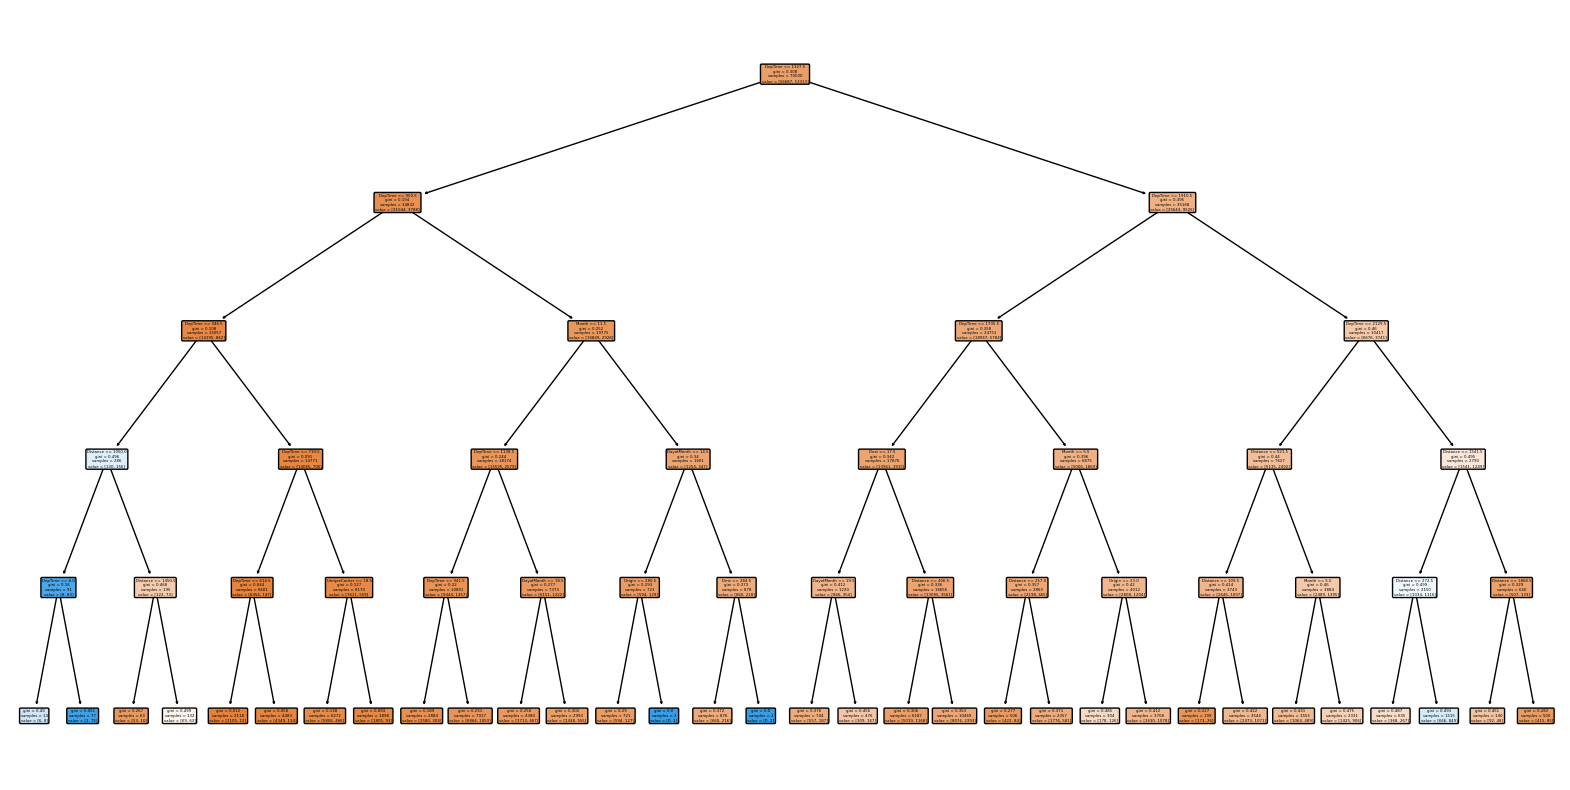

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, rounded=True, feature_names=X.columns.tolist())
plt.show()

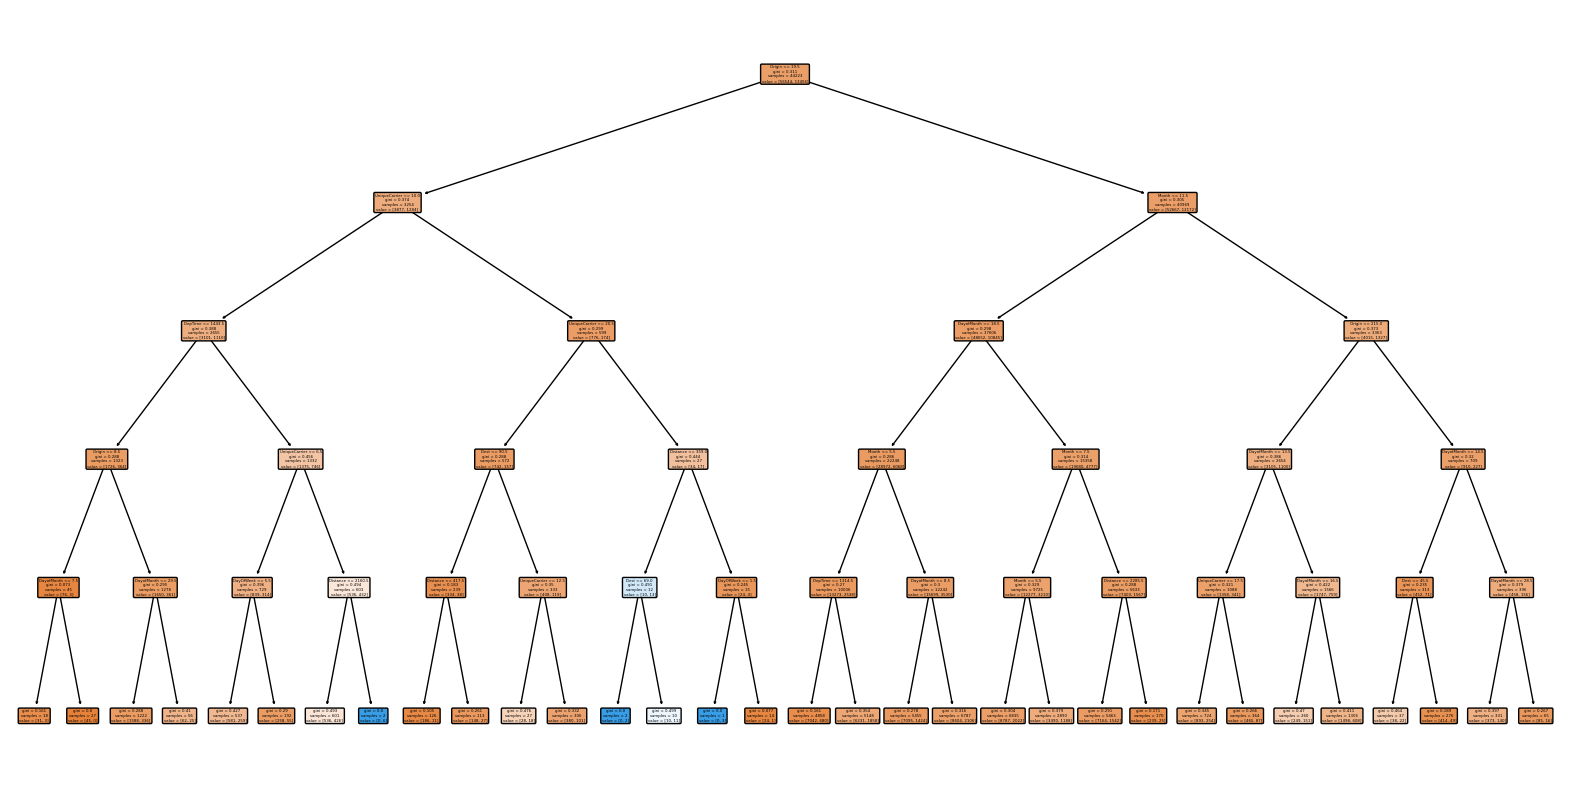

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0], filled=True, rounded=True, feature_names=X.columns.tolist())
plt.show()

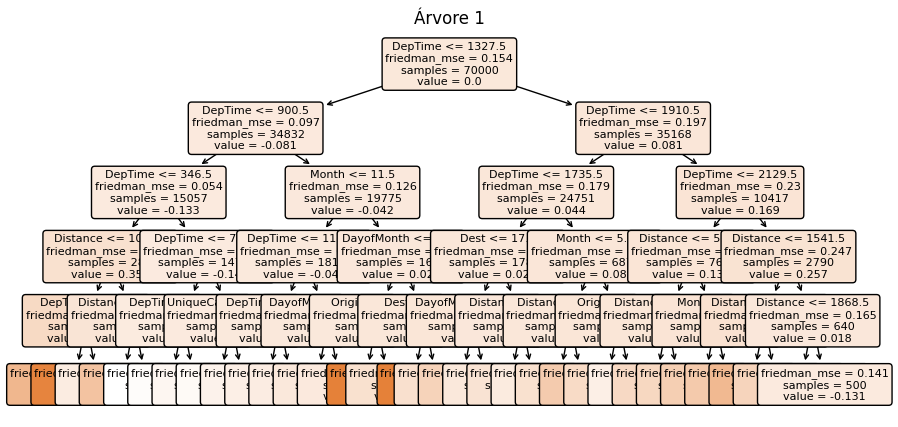

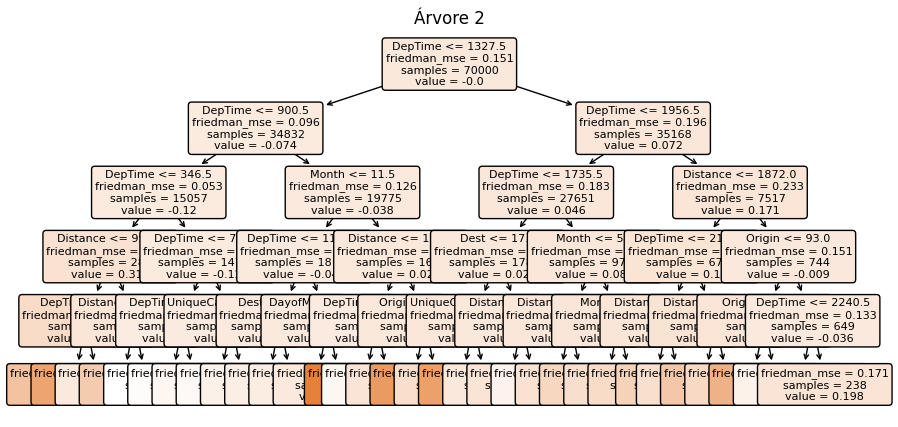

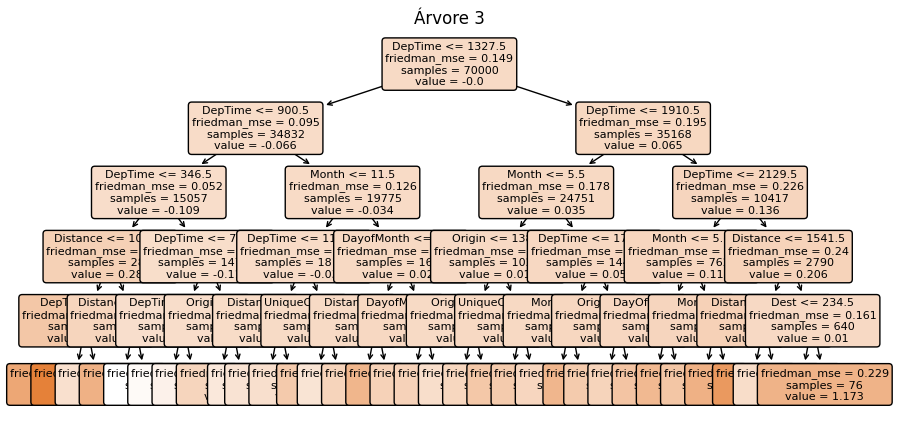

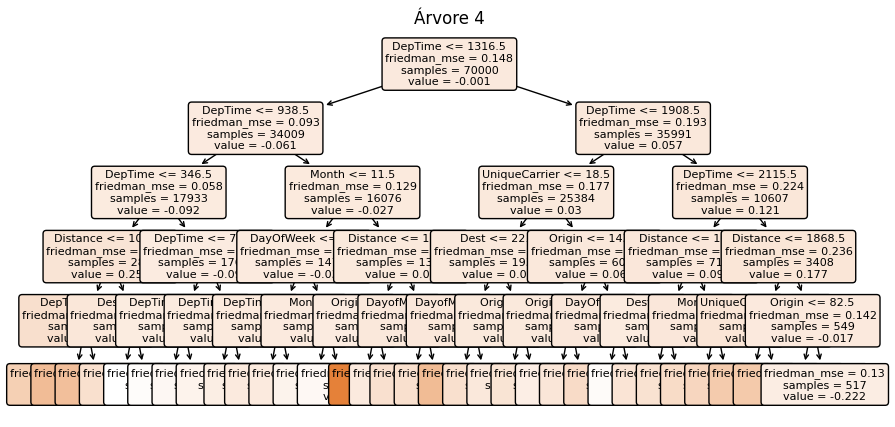

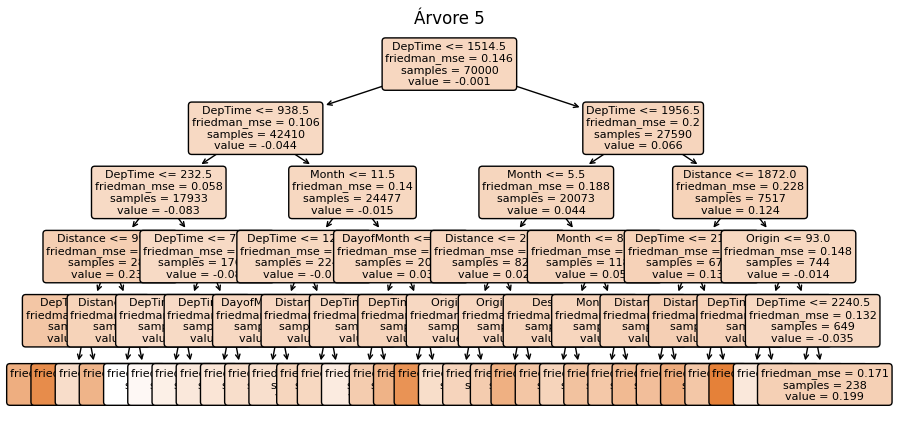

In [ ]:
# Visualize as primeiras cinco árvores
num_arvores_a_exibir = 5
for i in range(num_arvores_a_exibir):
    plt.figure(figsize=(10, 5))
    plot_tree(gbdt_model.estimators_[i][0], filled=True, rounded=True, feature_names=X.columns.tolist(), fontsize=8)
    plt.title(f'Árvore {i+1}')
    plt.show()

In [ ]:
# Decision Tree
dt_predictions = dt_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
dt_roc_auc = roc_auc_score(y_test, dt_predictions)
print(f'ROC AUC Score para Decision Tree: {dt_roc_auc}')

# Random Forest
rf_predictions = rf_model.predict_proba(X_test)[:, 1]
rf_roc_auc = roc_auc_score(y_test, rf_predictions)
print(f'ROC AUC Score para Random Forest: {rf_roc_auc}')

# Gradient Boosting
gbdt_predictions = gbdt_model.predict_proba(X_test)[:, 1]
gbdt_roc_auc = roc_auc_score(y_test, gbdt_predictions)
print(f'ROC AUC Score para Gradient Boosting: {gbdt_roc_auc}')

ROC AUC Score para Decision Tree: 0.6986568900905723
ROC AUC Score para Random Forest: 0.7063610391867992
ROC AUC Score para Gradient Boosting: 0.7361180150310126


Aqui, calculei o ROC AUC Score de cada um deles para termos comaprativos. Pode ser percebido que o melhor foi o gradient boosting, com 0.7361180150310126

## **XgBoost**

Como foi dito acima, separei um dataset especifico para o treinamento do xgboost, para que fosse mais facil fazer as etapas de treinamento e predicao.

Aqui, divido a base de dados de treinamento do kaggle, em X2 e y2, para que possa diferenciar dos outros.

In [ ]:
X2 = df2.drop('dep_delayed_15min', axis=1)
y2 = df2['dep_delayed_15min']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42, shuffle=True)

Apos isso, realizo o treinamento do xgboost

In [ ]:
# xgBoost
xgboost_model = XGBClassifier()
xgboost_model.fit(X2_train, y2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Aqui, calculo o ROC AUC Score do xgboost, para termos comparativos em relacao aos outros modelos plotados na atividade.

In [ ]:
# XgBoost
xgboost_predictions = xgboost_model.predict_proba(X2_test)[:, 1]
xgboost_roc_auc = roc_auc_score(y2_test, xgboost_predictions)
print(f'ROC AUC Score para Gradient Boosting: {xgboost_roc_auc}')

ROC AUC Score para Gradient Boosting: 0.7393452784870191


E por fim aplico as predicoes do modelo no "df2test", base de testes fornecida pelo kaggle.

In [ ]:
# Faça as previsões usando o conjunto de teste combinado
xgb_predictions_kaggle = xgboost_model.predict_proba(df2test)[:, 1]

submission_df = pd.Series(xgb_predictions_kaggle, name='dep_delayed_15min')

pd.Series(xgb_predictions_kaggle, name='dep_delayed_15min').to_csv('submission.csv', index_label='id', header=True)